In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns

In [52]:
df=pd.read_csv('train.csv')
df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [53]:
df.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [54]:
df.drop(['id','CustomerId','Surname'],axis=1,inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [55]:
df['Geography'].value_counts()

Geography
France     94215
Spain      36213
Germany    34606
Name: count, dtype: int64

In [56]:
mapGeography={'France':0,'Spain':1,'Germany':2}
df['Geography']=df['Geography'].map(mapGeography)
mapGender={'Male':0,'Female':1}
df['Gender']=df['Gender'].map(mapGender)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,0,0,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627,0,0,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678,0,0,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581,0,0,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716,1,0,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [57]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [58]:
train,validation=train_test_split(df,test_size=0.2,random_state=0)


In [59]:
from sklearn.tree import DecisionTreeClassifier
X,y=train.drop(['Exited'],axis=1),train['Exited']
X_val,y_val=validation.drop(['Exited'],axis=1),validation['Exited']
rf_classifier = DecisionTreeClassifier(random_state=42)
rf_classifier.fit(X, y)

DecisionTreeClassifier(random_state=42)

In [60]:
from sklearn.metrics import accuracy_score
y_pred=rf_classifier.predict(X_val)
accuracy_score(y_val,y_pred)

0.7999818220377496

In [61]:
df_submission=pd.read_csv('test.csv')
id_submission=df_submission['id']
df_submission.drop(['id','CustomerId','Surname'],axis=1,inplace=True)
df_submission['Geography']=df_submission['Geography'].map(mapGeography)
df_submission['Gender']=df_submission['Gender'].map(mapGender)
df_submission.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,586,0,1,23.0,2,0.00,2,0.0,1.0,160976.75
1,683,0,1,46.0,2,0.00,1,1.0,0.0,72549.27
2,656,0,1,34.0,7,0.00,2,1.0,0.0,138882.09
3,681,0,0,36.0,8,0.00,1,1.0,0.0,113931.57
4,752,2,0,38.0,10,121263.62,1,1.0,0.0,139431.00


In [62]:
y_pred=rf_classifier.predict(df_submission)

In [63]:
submission=pd.DataFrame({'id':id_submission,'Exited':y_pred})
submission.to_csv('submission.csv',index=False)

In [64]:
df['Exited'].value_counts()

Exited
0    130113
1     34921
Name: count, dtype: int64

In [65]:
from sklearn.metrics import precision_score, recall_score, f1_score
rf_classifier = DecisionTreeClassifier(class_weight={0:0.2,1:0.8},random_state=42)
rf_classifier.fit(X, y)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=42)

In [66]:
y_pred=rf_classifier.predict(X_val)
print('Precision: {:.2f}'.format(precision_score(y_val, y_pred)))
print('Recall: {:.2f}'.format(recall_score(y_val, y_pred)))
print('F1: {:.2f}'.format(f1_score(y_val, y_pred)))
print('Accuracy: {:.2f}'.format(accuracy_score(y_val, y_pred)))

Precision: 0.52
Recall: 0.52
F1: 0.52
Accuracy: 0.80


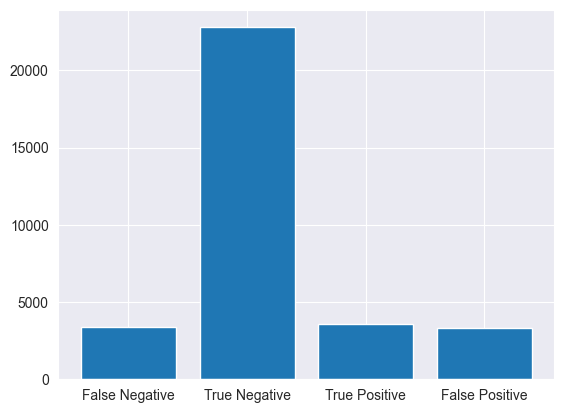

In [67]:
from sklearn.metrics import confusion_matrix
confusion=confusion_matrix(y_val, y_pred)
FN = confusion[1][0]
TN = confusion[0][0]
TP = confusion[1][1]
FP = confusion[0][1]
plt.bar(['False Negative' , 'True Negative' , 'True Positive' , 'False Positive'],[FN,TN,TP,FP])
plt.show()

In [68]:
#换随机森林模型
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100,max_depth=None,class_weight={0:0.2,1:0.8},random_state=42)
rf_classifier.fit(X, y)

RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=42)

In [69]:
y_pred=rf_classifier.predict(X_val)
print('Precision: {:.2f}'.format(precision_score(y_val, y_pred)))
print('Recall: {:.2f}'.format(recall_score(y_val, y_pred)))
print('F1: {:.2f}'.format(f1_score(y_val, y_pred)))
print('Accuracy: {:.2f}'.format(accuracy_score(y_val, y_pred)))

Precision: 0.73
Recall: 0.52
F1: 0.61
Accuracy: 0.86


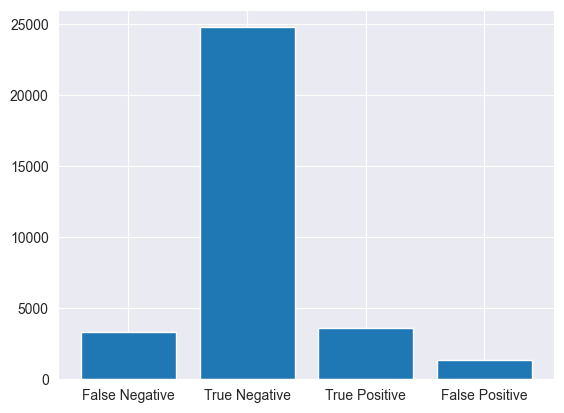

In [70]:
confusion=confusion_matrix(y_val, y_pred)
FN = confusion[1][0]
TN = confusion[0][0]
TP = confusion[1][1]
FP = confusion[0][1]
plt.bar(['False Negative' , 'True Negative' , 'True Positive' , 'False Positive'],[FN,TN,TP,FP])
plt.show()

In [71]:
y_pred=rf_classifier.predict(df_submission)
submission=pd.DataFrame({'id':id_submission,'Exited':y_pred})
submission.to_csv('submission1.csv',index=False)

In [72]:
#考虑过采样
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

In [73]:
y_res.value_counts()

Exited
0    104025
1    104025
Name: count, dtype: int64

In [77]:
rf_classifier = RandomForestClassifier(n_estimators=300,max_depth=40,random_state=42)
rf_classifier.fit(X_res, y_res)

RandomForestClassifier(max_depth=40, n_estimators=300, random_state=42)

In [78]:
y_res_pred=rf_classifier.predict(X_val)

print('Accuracy: {:.2f}'.format(accuracy_score(y_val, y_res_pred)))

Accuracy: 0.85


In [79]:
y_pred=rf_classifier.predict(df_submission)
submission=pd.DataFrame({'id':id_submission,'Exited':y_pred})
submission.to_csv('submission2.csv',index=False)